Preparation of the first training experiment. I've downloaded the mnist training dataset, and want to see if I can replicate LeNet. The setup is defined in the file My_LeNet.proto. The dataset comes in raw binary format, so lets have a look at one of the images. http://yann.lecun.com/exdb/mnist/

In [74]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
caffe_root = "/home/alex/Caffe/caffe/"
imgSize = 28
fileBinaryOffset = 16
labelBinaryOffset = 8

Since we have a different byte ordering to the one used in the generation of the images we have to read the byte info in this order. The first is a magic number, the next the number of images, and the next two the dimensions of each image. 

In [51]:
A = np.fromfile(caffe_root + "data/mnist/train-images-idx3-ubyte", 
                dtype='>i4', sep="",
                count = 4)
print A


[ 2051 60000    28    28]


Now try to view one of the images. They are in unsigned byte format, but we have to ignore the first 16 bytes as they contain the above info

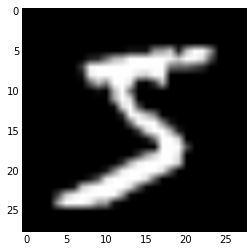

In [75]:
A = np.fromfile(caffe_root + "data/mnist/train-images-idx3-ubyte", 
                dtype='u1', sep="",
                count = imgSize**2 + fileBinaryOffset)
A = A[fileBinaryOffset:]
A = A.reshape([imgSize,imgSize])
plt.imshow(A);
plt.set_cmap('Greys_r')

Can we also read the labels file, just to see what format these all come in?

In [76]:
A = np.fromfile(caffe_root + "data/mnist/train-labels-idx1-ubyte", 
                dtype='u1', sep="",
                count = 1 + labelBinaryOffset)
A = A[labelBinaryOffset:]
print A

[5]
